In [58]:
import pandas as pd
df = pd.read_csv('MonkeyProof_postcodes_developer.csv', sep=';')

df = df.dropna(subset=['latitude', 'longitude'])

df = df.drop(columns=['link', 'gemeente'])

df = df.drop_duplicates(subset=['postcode'], keep='first')

df.to_csv('postcodes.csv', index=False, sep=';')


In [59]:
df = pd.read_csv('af - kopie.csv', sep=';')

df_postcodes = pd.read_csv('postcodes.csv', sep=';')

In [61]:
import numpy as np
df['patient_postcode'] = df['patient_postcode'].replace('ZZNF', 0)
df['afspraak_postcode'] = df['afspraak_postcode'].replace('ZZNF', 0)

df['afspraak_postcode'] = df['afspraak_postcode'].fillna(0)
df['patient_postcode'] = df['patient_postcode'].fillna(0)

In [62]:
df['patient_postcode'] = df['patient_postcode'].astype(int)
df['afspraak_postcode'] = df['afspraak_postcode'].astype(int)

In [63]:
df = df.merge(df_postcodes, left_on='patient_postcode', right_on='postcode', how='left')
df = df.rename(columns={'latitude': 'patient_latitude', 'longitude': 'patient_longitude'})
df.head()

df = df.merge(df_postcodes, left_on='afspraak_postcode', right_on='postcode', how='left')
df = df.rename(columns={'latitude': 'afspraak_latitude', 'longitude': 'afspraak_longitude'})

In [ ]:
import math

def calculate_distance(row):
    x1 = row['afspraak_longitude']
    y1 = row['afspraak_latitude']
    x2 = row['patient_longitude']
    y2 = row['patient_latitude']
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

df['afstand'] = df.apply(calculate_distance, axis=1)

In [ ]:
df2 = pd.read_csv('af - kopie.csv', sep=';')

df2 = df2.merge(df[['afspraak_id', 'afstand']], on='afspraak_id', how='left')

df2.head()


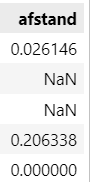

In [68]:
df2.to_csv('afsprakenn.csv', index=False, sep=';')